In [12]:
import numpy as np
import pandas as pd
import torch
from torch import nn
import pickle
import matplotlib.pyplot as plt
import data_tools
import bmi_lstm
from pathlib import Path
from netCDF4 import Dataset

#This is the outdated specific lstm.
import bmi_lstm_nwm3_aorc

In [2]:
model = bmi_lstm.bmi_LSTM()
model.initialize(bmi_cfg_file=Path('lstm_bmi_config.yml'))

thank you for choosing LSTM


/glade/work/jframe/alt-modular-lstm-cleanup/alt-modular/Modules/LSTM/bmi_lstm.py:108: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(fp)
/glade/work/jframe/alt-modular-lstm-cleanup/alt-modular/Modules/LSTM/bmi_lstm.py:187: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(fp)


In [3]:
with open(Path(model.cfg_train['run_dir'] / 'test/model_epoch001' / 'test_results.p'), 'rb') as fb:
    test_results = pickle.load(fb)

In [4]:
test_results.keys()

dict_keys(['01022500', '01547700', '02064000', '03015500'])

In [5]:
test_results['01022500']['1H']['xr']

<xarray.Dataset>
Dimensions:               (date: 17520, time_step: 1)
Coordinates:
  * date                  (date) datetime64[ns] 2001-01-01 ... 2002-12-31T23:00:00
  * time_step             (time_step) int64 0
Data variables:
    qobs_mm_per_hour_obs  (date, time_step) float64 nan nan nan ... nan nan nan
    qobs_mm_per_hour_sim  (date, time_step) float64 0.1013 0.1011 ... 0.09974

In [6]:
input_data = Dataset('/glade/work/jframe/neuralhydrology/'+ \
                     'test/test_data/camels_us/hourly/usgs-streamflow-nldas_hourly.nc', 'r')


In [11]:
input_data['date']

<class 'netCDF4._netCDF4.Variable'>
int64 date(date)
    units: hours since 2000-01-01 00:00:00
    calendar: proleptic_gregorian
unlimited dimensions: 
current shape = (26304,)
filling on, default _FillValue of -9223372036854775806 used

In [8]:
len(list(input_data['temperature'][0].data))

26304

In [9]:
runoff_output_list = []

for temp, precip in zip(list(input_data['total_precipitation'][0].data),
                        list(input_data['temperature'][0].data)):
    model.set_value('atmosphere_water__liquid_equivalent_precipitation_rate',precip)
    model.set_value('land_surface_air__temperature',temp)

    model.update()

    runoff_output_list.append(model.streamflow)

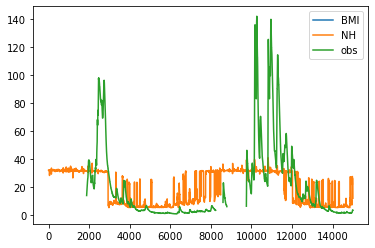

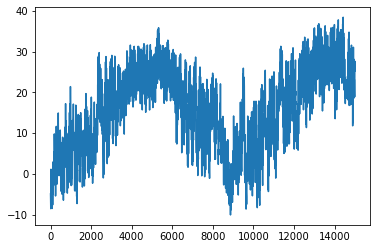

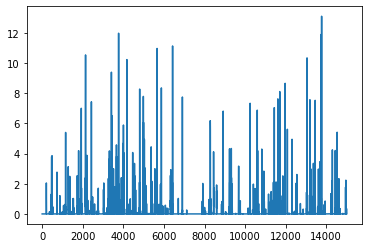

In [41]:
start_plot = 365*24
n_plot = 15000
plt.plot(runoff_output_list[start_plot:start_plot+n_plot], label='BMI')
plt.plot(test_results['01022500']['1H']['xr'].qobs_mm_per_hour_sim[:n_plot] * model.output_factor, label='NH')
plt.plot(test_results['01022500']['1H']['xr'].qobs_mm_per_hour_obs[:n_plot] * model.output_factor, label='obs')
plt.legend()
plt.show()
plt.close()
plt.plot(list(input_data['temperature'][0].data[start_plot:start_plot+n_plot]))
plt.show()
plt.close()
plt.plot(list(input_data['total_precipitation'][0].data[start_plot:start_plot+n_plot]))

thank you for choosing LSTM


/glade/work/jframe/alt-modular-lstm-cleanup/alt-modular/Modules/LSTM/bmi_lstm.py:108: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(fp)
/glade/work/jframe/alt-modular-lstm-cleanup/alt-modular/Modules/LSTM/bmi_lstm.py:187: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(fp)


thank you for choosing LSTM
thank you for choosing LSTM
thank you for choosing LSTM
thank you for choosing LSTM
thank you for choosing LSTM
thank you for choosing LSTM
thank you for choosing LSTM
thank you for choosing LSTM


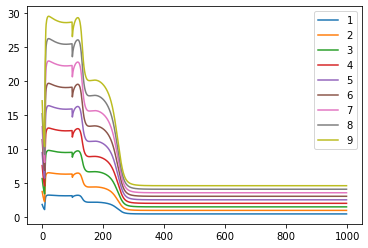

In [40]:
# Some silly test of the basin area...

for area_sqkm in list(range(1,10)):
    
    model = bmi_lstm.bmi_LSTM()
    model.initialize(bmi_cfg_file=Path('lstm_bmi_config.yml'))
    
    # This is fake, this is really taked care of in initiallize
    model.output_factor =  area_sqkm * 35.315 # from m3/s to ft3/s
    
    runoff_output_list = []
    model.set_value('land_surface_air__temperature',25)
    for i in range(1,1000):

        if i in list(range(10,100)):
            model.set_value('atmosphere_water__liquid_equivalent_precipitation_rate',5)
        else:
            model.set_value('atmosphere_water__liquid_equivalent_precipitation_rate',0)

        model.update()

        runoff_output_list.append(model.streamflow)
        
    plt.plot(runoff_output_list, label=area_sqkm)
    plt.legend()
plt.show()
plt.close()

# Old stuff Below...

In [13]:
model_lstm_nwm3_aorc = bmi_lstm_nwm3_aorc.bmi_LSTM()
model_lstm_nwm3_aorc.read_cfg_file('lstm-info.cfg')

In [14]:
model_lstm_nwm3_aorc.initialize()

In [15]:
model_lstm_nwm3_aorc.input_tensor.shape

torch.Size([2492, 11])

In [16]:
model_lstm_nwm3_aorc.update()

updating for t:  1772
start_this_seq 1771
for time: 1773 lstm output: 26.464825059931275


In [17]:
model_lstm_nwm3_aorc.input_tensor.shape

torch.Size([2492, 11])

In [19]:
model_lstm_nwm3_aorc.update_until(model_lstm_nwm3_aorc.iend)

updating for t:  1773
start_this_seq 1772
for time: 1774 lstm output: 20.112555098483824
updating for t:  1774
start_this_seq 1773
for time: 1775 lstm output: 16.852312281650512
updating for t:  1775
start_this_seq 1774
for time: 1776 lstm output: 14.78169671249273
updating for t:  1776
start_this_seq 1775
for time: 1777 lstm output: 13.18190545875549
updating for t:  1777
start_this_seq 1776
for time: 1778 lstm output: 12.08279310799716
updating for t:  1778
start_this_seq 1777
for time: 1779 lstm output: 11.01406926653117
updating for t:  1779
start_this_seq 1778
for time: 1780 lstm output: 9.938357575039204
updating for t:  1780
start_this_seq 1779
for time: 1781 lstm output: 9.656570041522016
updating for t:  1781
start_this_seq 1780
for time: 1782 lstm output: 9.124591010730807
updating for t:  1782
start_this_seq 1781
for time: 1783 lstm output: 8.506807724689041
updating for t:  1783
start_this_seq 1782
for time: 1784 lstm output: 8.548604331064814
updating for t:  1784
start_th

for time: 2085 lstm output: 2.1901846204887705
updating for t:  2085
start_this_seq 2084
for time: 2086 lstm output: 2.6941460853157606
updating for t:  2086
start_this_seq 2085
for time: 2087 lstm output: 2.8203427603508655
updating for t:  2087
start_this_seq 2086
for time: 2088 lstm output: 2.5586678104302685
updating for t:  2088
start_this_seq 2087
for time: 2089 lstm output: 2.7583490251125373
updating for t:  2089
start_this_seq 2088
for time: 2090 lstm output: 2.7403169902348843
updating for t:  2090
start_this_seq 2089
for time: 2091 lstm output: 2.933949542519604
updating for t:  2091
start_this_seq 2090
for time: 2092 lstm output: 2.733360385198505
updating for t:  2092
start_this_seq 2091
for time: 2093 lstm output: 2.4326439018082198
updating for t:  2093
start_this_seq 2092
for time: 2094 lstm output: 2.738587488163753
updating for t:  2094
start_this_seq 2093
for time: 2095 lstm output: 2.48062517818331
updating for t:  2095
start_this_seq 2094
for time: 2096 lstm output

updating for t:  2386
start_this_seq 2385
for time: 2387 lstm output: 25.06199303090038
updating for t:  2387
start_this_seq 2386
for time: 2388 lstm output: 25.31565455996005
updating for t:  2388
start_this_seq 2387
for time: 2389 lstm output: 24.055784899793014
updating for t:  2389
start_this_seq 2388
for time: 2390 lstm output: 22.678996488560134
updating for t:  2390
start_this_seq 2389
for time: 2391 lstm output: 21.64031562356037
updating for t:  2391
start_this_seq 2390
for time: 2392 lstm output: 20.347432874974988
updating for t:  2392
start_this_seq 2391
for time: 2393 lstm output: 19.42434560589411
updating for t:  2393
start_this_seq 2392
for time: 2394 lstm output: 18.497598997149446
updating for t:  2394
start_this_seq 2393
for time: 2395 lstm output: 18.116178543574904
updating for t:  2395
start_this_seq 2394
for time: 2396 lstm output: 17.29373873774295
updating for t:  2396
start_this_seq 2395
for time: 2397 lstm output: 16.83003092818789
updating for t:  2397
start

In [20]:
print(np.array(model_lstm_nwm3_aorc.obs).shape)
print(len(model_lstm_nwm3_aorc.output_list))

(720,)
720


Text(0, 0.5, 'precipitation (kg/m2)')

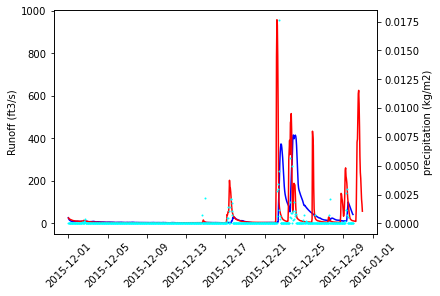

In [21]:
fig, ax = plt.subplots(constrained_layout=True)
xdata = pd.date_range(model_lstm_nwm3_aorc.test_date_start, model_lstm_nwm3_aorc.test_date_end, freq="H")
ax.plot(xdata, model_lstm_nwm3_aorc.output_list[:xdata.shape[0]], label='lstm output', c='b')
ax.plot(model_lstm_nwm3_aorc.obs, label='observation', c='r')
ax.set_ylabel('Runoff (ft3/s)')
plt.xticks(rotation = 45)
ax2=ax.twinx()
ax2.scatter(xdata,model_lstm_nwm3_aorc.forcings['RAINRATE'].values[-721:-24], s=1, c='cyan', label='precip')
ax2.set_ylabel('precipitation (kg/m2)')

In [22]:
model_lstm_nwm3_aorc.calc_metrics()

Nash-Suttcliffe Efficiency -0.3094241687752095
on 720 samples


In [23]:
model_lstm_nwm3_aorc.get_time_step()

'1 hour'

In [24]:
model_lstm_nwm3_aorc.get_attribute('model_name')

'LSTM for Next Generation NWM'

In [25]:
model_lstm_nwm3_aorc.get_input_var_names()

['land_surface_radiation~incoming~longwave__energy_flux',
 'land_surface_air__pressure',
 'atmosphere_air_water~vapor__relative_saturation',
 'atmosphere_water__liquid_equivalent_precipitation_rate',
 'land_surface_radiation~incoming~shortwave__energy_flux',
 'land_surface_air__temperature',
 'land_surface_wind__x_component_of_velocity',
 'land_surface_wind__y_component_of_velocity']

In [26]:
model.get_output_var_names()

['land_surface_water__runoff_volume_flux']

In [27]:
model.get_var_name('atmosphere_water__liquid_equivalent_precipitation_rate')

'total_precipitation'

In [35]:
model_lstm_nwm3_aorc.get_var_units('atmosphere_water__liquid_equivalent_precipitation_rate')

'kg m-2'

In [36]:
model_lstm_nwm3_aorc.get_var_type("land_surface_water__runoff_volume_flux")

"<class 'float'>"

In [37]:
model.get_var_units("land_surface_water__runoff_volume_flux")

'mm'

In [38]:
model_lstm_nwm3_aorc.get_var_rank("land_surface_water__runoff_volume_flux")

0

In [39]:
model_lstm_nwm3_aorc.run_unit_tests()

Unit test passed: get_output_var_names
Unit test passed: get_var_name
Unit test passed: get_var_units
Unit test passed: get_var_rank
